In [169]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [170]:
# Load the dataset
file_path = "regular_gas_prices_1979_2024.csv"  # File path
df = pd.read_csv(file_path)

In [171]:
# Display the first few rows of the data
print(df.head())

  REF_DATE                                                GEO         DGUID  \
0  1979-01              St. John's, Newfoundland and Labrador  2011S0503001   
1  1979-01  Charlottetown and Summerside, Prince Edward Is...           NaN   
2  1979-01                               Halifax, Nova Scotia  2011S0503205   
3  1979-01                          Saint John, New Brunswick  2011S0503310   
4  1979-01                                     Québec, Quebec  2011S0503421   

                                        Type of fuel              UOM  UOM_ID  \
0  Regular unleaded gasoline at full service fill...  Cents per litre      57   
1  Regular unleaded gasoline at full service fill...  Cents per litre      57   
2  Regular unleaded gasoline at full service fill...  Cents per litre      57   
3  Regular unleaded gasoline at full service fill...  Cents per litre      57   
4  Regular unleaded gasoline at full service fill...  Cents per litre      57   

  SCALAR_FACTOR  SCALAR_ID   VECTOR  C

In [123]:
# Select relevant columns
df = df[['REF_DATE', 'VALUE']]

In [124]:
# Rename columns for clarity
df.columns = ['date', 'price']

In [125]:
# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m')
df.set_index('date', inplace=True)

In [126]:
# Ensure price is numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [127]:
# Drop any missing values
df.dropna(inplace=True)

In [128]:
# Display cleaned data
print(df.head())

            price
date             
1979-01-01   26.0
1979-01-01   24.6
1979-01-01   23.4
1979-01-01   23.2
1979-01-01   22.6


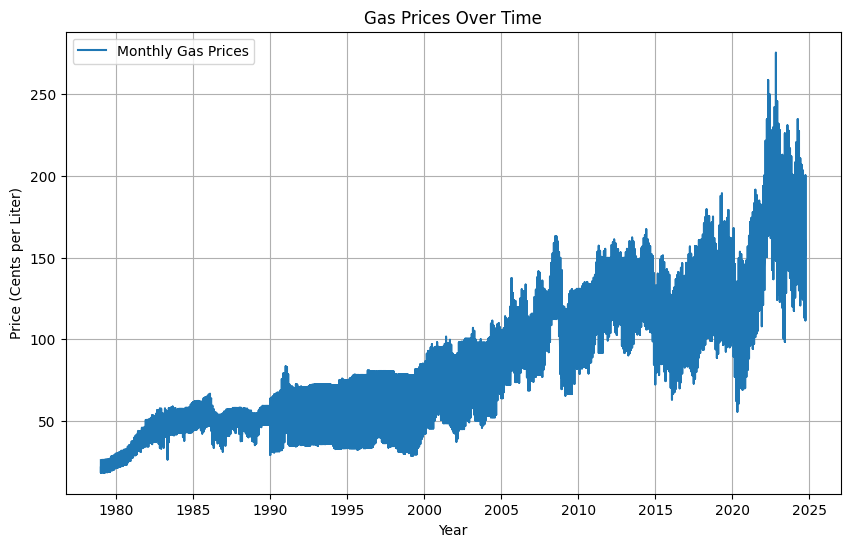

In [129]:
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['price'], label='Monthly Gas Prices')
plt.title('Gas Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Price (Cents per Liter)')
plt.legend()
plt.grid()
plt.show()

### Stationarity Test and Differencing

In [130]:
# Perform ADF test to check for stationarity
result = adfuller(df['price'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -2.717797172998439
p-value: 0.0710088881245129


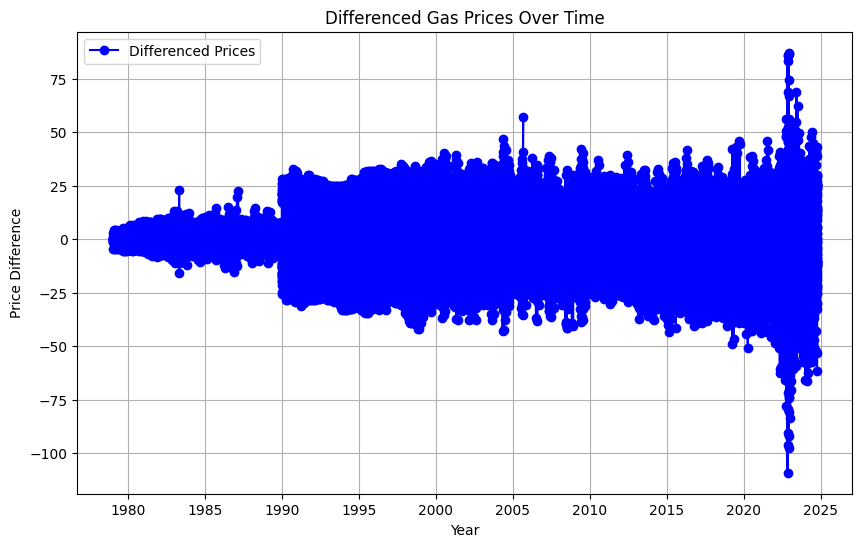

In [131]:
# Check if the data is non-stationary by evaluating p-value
# If p-value > 0.05, apply differencing to make the data stationary
if result[1] > 0.05:  # Check if p-value indicates non-stationarity
    # Apply first-order differencing to remove trends
    df['price_diff'] = df['price'].diff()
    
    # Drop rows with NaN values caused by differencing
    df = df.dropna()

    # Plot the differenced data to visualize stationarity
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['price_diff'], label='Differenced Prices', color='blue', marker='o')
    plt.title('Differenced Gas Prices Over Time')
    plt.xlabel('Year')
    plt.ylabel('Price Difference')
    plt.legend()
    plt.grid()
    plt.show()

# ARIMA Model

In [132]:
# Import ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [133]:
# Define ARIMA model parameters
# (p, d, q) = (1, 1, 1) -> Adjust these based on your data's behavior
model = ARIMA(df['price_diff'], order=(1, 1, 1))

c:\Users\godsj\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\godsj\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\godsj\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [134]:
#Fit the ARIMA model
fitted_model = model.fit()

In [135]:
# Display model summary
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:             price_diff   No. Observations:                44651
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -176492.374
Date:                Thu, 05 Dec 2024   AIC                         352990.748
Time:                        11:11:05   BIC                         353016.868
Sample:                             0   HQIC                        352998.973
                              - 44651                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2954      0.004    -73.113      0.000      -0.303      -0.287
ma.L1         -1.0000      0.010    -95.576      0.000      -1.020      -0.979
sigma2       158.7720      1.901     83.507      0.0

In [136]:
# Forecast future prices (e.g., next 12 months)
forecast = fitted_model.forecast(steps=12)

c:\Users\godsj\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\godsj\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [137]:
# Create a time index for the forecasted values
forecast_index = pd.date_range(start=df.index[-1], periods=12, freq='M')

C:\Users\godsj\AppData\Local\Temp\ipykernel_30948\3999376282.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=df.index[-1], periods=12, freq='M')


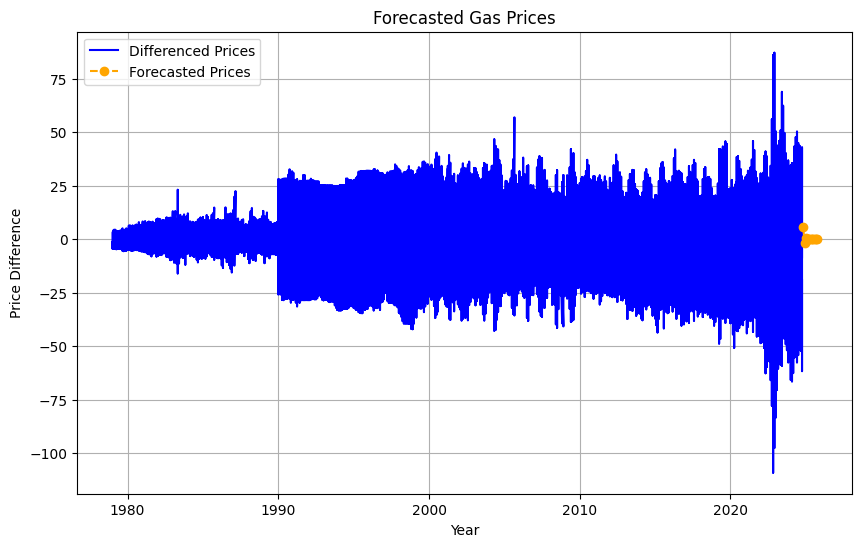

In [138]:
# Visualize the forecast results
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['price_diff'], label='Differenced Prices', color='blue')
plt.plot(forecast_index, forecast, label='Forecasted Prices', color='orange', linestyle='--', marker='o')
plt.title('Forecasted Gas Prices')
plt.xlabel('Year')
plt.ylabel('Price Difference')
plt.legend()
plt.grid()
plt.show()

In [139]:
# Add the forecasted differences to the last actual price to restore the original prices
last_actual_price = df['price'].iloc[-1]  # Get the last actual price from the dataset

# Calculate cumulative sum of forecasted differences
forecasted_prices = forecast.cumsum() + last_actual_price

# Create a DataFrame to combine the forecasted dates and prices
forecasted_df = pd.DataFrame({
    'date': forecast_index,
    'forecasted_price': forecasted_prices
})

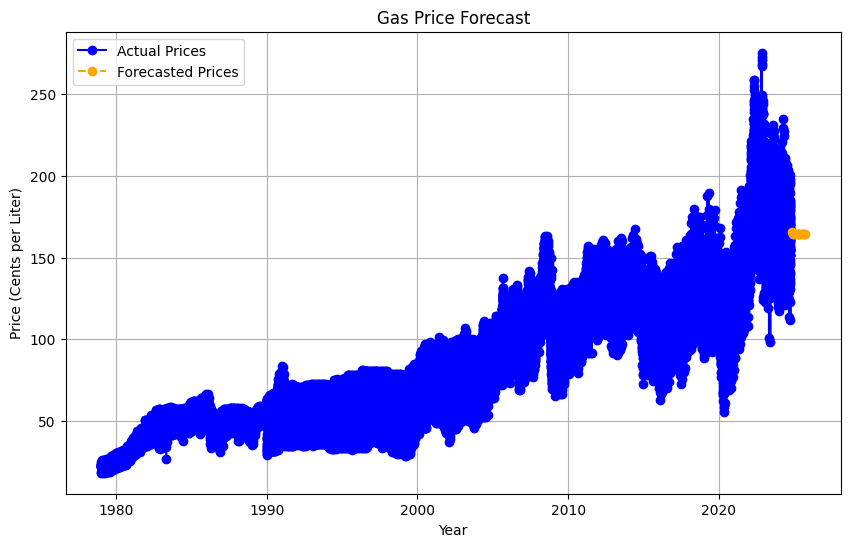

In [140]:
# Visualize the original prices along with the forecasted prices
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['price'], label='Actual Prices', color='blue', marker='o')
plt.plot(forecasted_df['date'], forecasted_df['forecasted_price'], label='Forecasted Prices', color='orange', linestyle='--', marker='o')
plt.title('Gas Price Forecast')
plt.xlabel('Year')
plt.ylabel('Price (Cents per Liter)')
plt.legend()
plt.grid()
plt.show()

In [141]:
# Print forecasted prices for the next 12 months
print(forecasted_df)

            date  forecasted_price
44651 2024-10-31        165.874974
44652 2024-11-30        164.202853
44653 2024-12-31        164.700777
44654 2025-01-31        164.557755
44655 2025-02-28        164.604043
44656 2025-03-31        164.594416
44657 2025-04-30        164.601304
44658 2025-05-31        164.603314
44659 2025-06-30        164.606765
44660 2025-07-31        164.609791
44661 2025-08-31        164.612942
44662 2025-09-30        164.616056


# SARIMA Model

In [158]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [159]:
# Fit a SARIMA model
sarima_model = SARIMAX(df['price'], 
                       order=(1, 1, 1), 
                       seasonal_order=(1, 1, 1, 12), 
                       enforce_stationarity=False, 
                       enforce_invertibility=False)
sarima_result = sarima_model.fit()

c:\Users\godsj\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\godsj\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [160]:
# Forecast the next 12 months
forecast_sarima = sarima_result.get_forecast(steps=12)
forecasted_mean = forecast_sarima.predicted_mean
forecast_ci = forecast_sarima.conf_int()

c:\Users\godsj\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\godsj\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


C:\Users\godsj\AppData\Local\Temp\ipykernel_30948\103688057.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(df.index[-1], periods=12, freq='M')


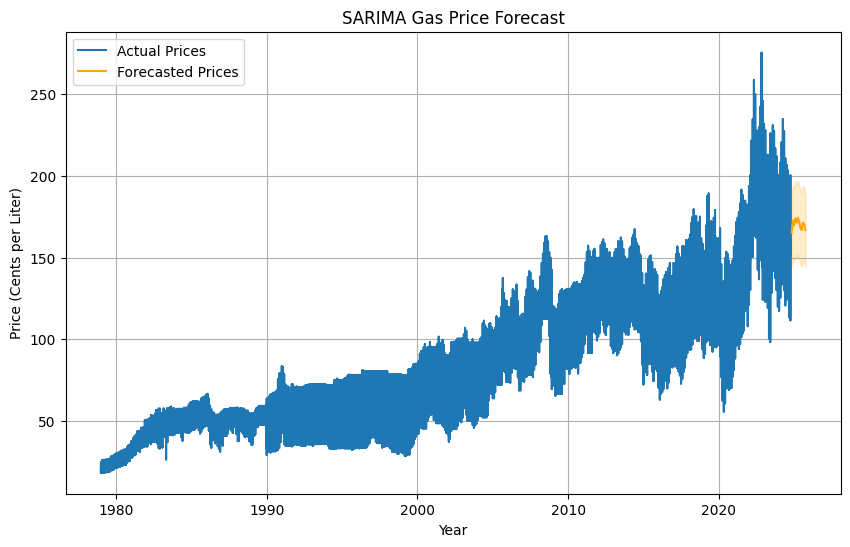

In [161]:
# Visualize the forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['price'], label='Actual Prices')
forecast_index = pd.date_range(df.index[-1], periods=12, freq='M')
plt.plot(forecast_index, forecasted_mean, label='Forecasted Prices', color='orange')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='orange', alpha=0.2)
plt.title('SARIMA Gas Price Forecast')
plt.xlabel('Year')
plt.ylabel('Price (Cents per Liter)')
plt.legend()
plt.grid()
plt.show()

In [167]:
# Print forecasted prices
print(forecasted_mean)

44651    165.354319
44652    172.721607
44653    169.798982
44654    174.021777
44655    171.427285
44656    174.463969
44657    172.295907
44658    168.410962
44659    166.921489
44660    171.491307
44661    170.162709
44662    166.989768
Name: predicted_mean, dtype: float64


In [173]:
print(df.columns)

Index(['REF_DATE', 'GEO', 'DGUID', 'Type of fuel', 'UOM', 'UOM_ID',
       'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS',
       'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')


In [172]:
# Ensure the DataFrame index is in datetime format
df['Date'] = pd.to_datetime(df['REF_DATE']) 
df.set_index('Date', inplace=True)

# Create a date range for forecasted dates
forecasted_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=len(forecasted_mean), freq='M')

# Combine dates and forecasted values into a DataFrame
forecasted_df = pd.DataFrame({
    'Date': forecasted_dates,
    'Forecasted_Price': forecasted_mean
})

# Reset index for better readability
forecasted_df.reset_index(drop=True, inplace=True)

# Print the forecasted DataFrame
print(forecasted_df)

         Date  Forecasted_Price
0  2024-11-30        165.354319
1  2024-12-31        172.721607
2  2025-01-31        169.798982
3  2025-02-28        174.021777
4  2025-03-31        171.427285
5  2025-04-30        174.463969
6  2025-05-31        172.295907
7  2025-06-30        168.410962
8  2025-07-31        166.921489
9  2025-08-31        171.491307
10 2025-09-30        170.162709
11 2025-10-31        166.989768


C:\Users\godsj\AppData\Local\Temp\ipykernel_30948\2373876429.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecasted_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=len(forecasted_mean), freq='M')


In [112]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming 'test_data' contains actual prices for the forecasted period
test_data = [165.3, 172.7, 169.7, 174.0, 171.4, 174.4, 172.3, 168.4, 166.9, 171.4, 170.1, 166.9]  # 실제 데이터 예제

# Calculate error metrics
mse = mean_squared_error(test_data, forecasted_mean)
mae = mean_absolute_error(test_data, forecasted_mean)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 0.003287653588212005
Mean Absolute Error: 0.04735556292577314


In [113]:
import pandas as pd

df = pd.read_csv('regular_gas_prices_1979_2024.csv')

df.shape[0]


44652

In [114]:
from sklearn.metrics import r2_score

test_data = [165.3, 172.7, 169.7, 174.0, 171.4, 174.4, 172.3, 168.4, 166.9, 171.4, 170.1, 166.9]  # 실제값
forecasted_mean = [165.354319, 172.721607, 169.798982, 174.021777, 171.427285, 174.463969,
                   172.295907, 168.410962, 166.921489, 171.491307, 170.162709, 166.989768]  # SARIMA 예측값

# R² 
r2 = r2_score(test_data, forecasted_mean)
print(f"R² Score: {r2:.4f}")

R² Score: 0.9996
